In [136]:
import pandas as pd
import numpy as np
import glob

csv_files = glob.glob('*.csv')
#list that will store all dataframes
all_df=[]
# Read the CSV file into a pandas datafrdme
for files in csv_files:
  df=pd.read_csv(files,delimiter=",")  
  all_df.append(df)
#concatenate all dataframes into one
us_census=pd.concat(all_df)
us_census=us_census.reset_index(drop=True)
us_census=us_census.drop(us_census.columns[0],axis=1)
print(us_census.dtypes)
#splitting GenderPop into two columns
us_census[['Male', 'Female']] = us_census['GenderPop'].str.split('_', expand=True)
#Replace M and F of the Male and Female columns with empty string
us_census['Male']=us_census['Male'].str.replace('M', '')
us_census['Female']=us_census['Female'].str.replace('F', '')
# us_census=us_census.drop("GenderPop",axis=1)
#Replacing empty strings of Male and Female column with Nan values and converting column to type float
us_census['Female'] = us_census['Female'].replace('',np.nan).astype(float)
us_census['Male'] = us_census['Male'].replace('',np.nan).astype(float)
#Removing dollar sign in income column and converting column to type float
us_census['Income']=us_census['Income'].str.replace('$', '')
us_census['Income'] = us_census['Income'].replace('',np.nan).astype(float)
us_census["Female"]


State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


<ipython-input-136-8b1961cd4936>:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_census['Income']=us_census['Income'].str.replace('$', '')


0            NaN
1      3455936.0
2      5038598.0
3      2727005.0
4      1536358.0
5      3081445.0
6      1558931.0
7      1453125.0
8      2233145.0
9      2364097.0
10      679019.0
11           NaN
12     2489527.0
13      349215.0
14     3342840.0
15     1506295.0
16    19334329.0
17     2630239.0
18     5123362.0
19      696428.0
20      806083.0
21     6556862.0
22     3333382.0
23     1558931.0
24     3081445.0
25           NaN
26      939759.0
27     1390901.0
28      670717.0
29     4561386.0
30     4561386.0
31     1051703.0
32    10131373.0
33     5049925.0
34      353677.0
35     5913084.0
36      543273.0
37     2455167.0
38      419713.0
39     3331859.0
40    13367298.0
41     1444150.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48     2630239.0
49     1841615.0
50      478041.0
51      340810.0
52    10045763.0
53     5123362.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [137]:
#Replacing Nan values of Female column 
us_census['Female'] = us_census["Female"].fillna(us_census["TotalPop"] - us_census["Male"])
print(us_census["Female"])


0      3057895.0
1      3455936.0
2      5038598.0
3      2727005.0
4      1536358.0
5      3081445.0
6      1558931.0
7      1453125.0
8      2233145.0
9      2364097.0
10      679019.0
11     3057895.0
12     2489527.0
13      349215.0
14     3342840.0
15     1506295.0
16    19334329.0
17     2630239.0
18     5123362.0
19      696428.0
20      806083.0
21     6556862.0
22     3333382.0
23     1558931.0
24     3081445.0
25      504536.0
26      939759.0
27     1390901.0
28      670717.0
29     4561386.0
30     4561386.0
31     1051703.0
32    10131373.0
33     5049925.0
34      353677.0
35     5913084.0
36      543273.0
37     2455167.0
38      419713.0
39     3331859.0
40    13367298.0
41     1444150.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48     2630239.0
49     1841615.0
50      478041.0
51      340810.0
52    10045763.0
53     5123362.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [138]:
#Checking and removing the duplicates
print(f'duplicate rows={us_census.duplicated().sum()}')
print(f"total rows={len(us_census)}")


us_census=us_census.drop_duplicates()
print(f"number of rows after removing duplicates={len(us_census)}")


duplicate rows=9
total rows=60
number of rows after removing duplicates=51


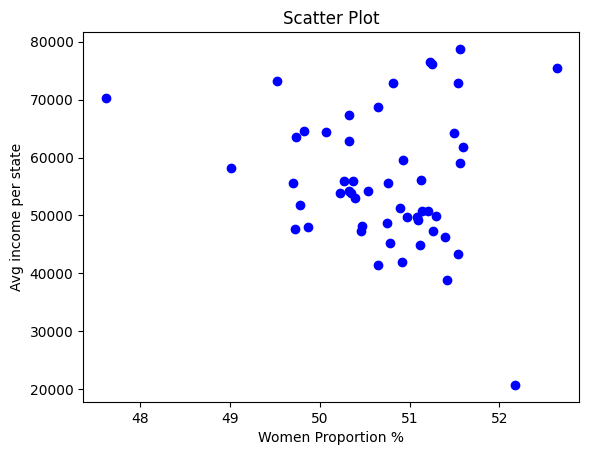

In [139]:
#Constructing Scatterplot
import matplotlib.pyplot as plt


plt.scatter((us_census["Female"]/us_census["TotalPop"])*100
            ,us_census["Income"], marker='o', color='blue', label='Data')
# Add axis labels and a title
plt.xlabel('Women Proportion %')
plt.ylabel('Avg income per state')
plt.title('Scatter Plot')

# Display the plot
plt.show()

In [140]:
# Removing % sign and changing empty entries of races columns with Nan
print(us_census.columns)
us_census['Hispanic'] = us_census['Hispanic'].str.replace('%', '').replace('',np.nan).astype('float')
us_census['White'] = us_census['White'].str.replace('%', '').replace('',np.nan).astype('float')
us_census['Black'] = us_census['Black'].str.replace('%', '').replace('',np.nan).astype('float')
us_census['Native'] = us_census['Native'].str.replace('%', '').replace('',np.nan).astype('float')
us_census['Asian'] = us_census['Asian'].str.replace('%', '').replace('',np.nan).astype('float')
us_census['Pacific'] = us_census['Pacific'].str.replace('%', '').replace('',np.nan).astype('float')
us_census


Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Male', 'Female'],
      dtype='object')


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,Maryland,5930538,8.472498,52.679050,30.677754,0.203096,5.325414,0.036285,78765.400725,2872643M_F,2872643.0,3057895.0
1,Massachusetts,6705586,11.461066,73.041052,6.833128,0.128279,5.835656,0.019809,72838.936726,3249650M_3455936F,3249650.0,3455936.0
2,Michigan,9900571,4.634993,72.381722,17.633103,0.484411,2.423110,0.019549,51201.830037,4861973M_5038598F,4861973.0,5038598.0
3,Minnesota,5419171,5.152924,81.427061,5.659820,1.069040,4.156072,0.032909,62820.833959,2692166M_2727005F,2692166.0,2727005.0
4,Mississippi,2988081,2.842401,53.286322,41.491945,0.389970,0.876444,0.015046,38909.919207,1451723M_1536358F,1451723.0,1536358.0
5,Missouri,6045448,4.037248,77.508069,14.122118,0.363329,1.624496,0.101657,49763.987726,2964003M_3081445F,2964003.0,3081445.0
6,Iowa,3093526,5.303645,87.719684,3.256987,0.289793,1.699392,0.055164,53017.753041,1534595M_1558931F,1534595.0,1558931.0
7,Kansas,2892987,11.644342,75.958289,6.567895,0.733947,2.331053,NaN,53885.612648,1439862M_1453125F,1439862.0,1453125.0
8,Kentucky,4397353,3.222994,85.230748,8.272317,0.166637,1.129847,0.046438,45285.802536,2164208M_2233145F,2164208.0,2233145.0
9,Louisiana,4625253,4.866489,54.978546,36.326241,0.484309,1.669060,0.039184,44957.993761,2261156M_2364097F,2261156.0,2364097.0


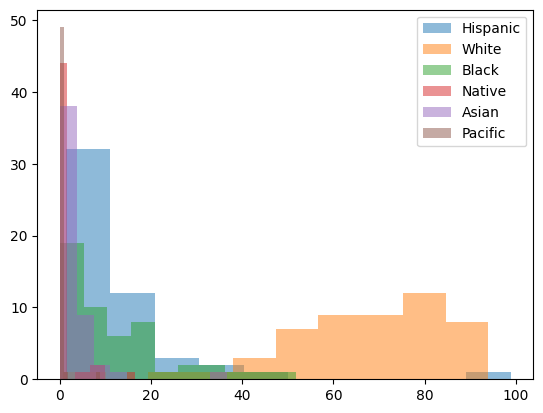

In [143]:
# Fill in nan values with 0
us_census = us_census.fillna(value={'Hispanic': 0, 'White': 0, 'Black': 0, 'Native': 0, 'Asian': 0, 'Pacific': 0})
if(us_census.duplicated().sum()):
    us_census=us_census.drop_duplicates()

#Plot histogram of each
plt.hist(us_census['Hispanic'], alpha=0.5,label='Hispanic')
plt.hist(us_census['White'], alpha=0.5, label='White')
plt.hist(us_census['Black'], alpha=0.5, label='Black')
plt.hist(us_census['Native'], alpha=0.5, label='Native')
plt.hist(us_census['Asian'], alpha=0.5, label='Asian')
plt.hist(us_census['Pacific'], alpha=0.5, label='Pacific')
plt.legend(loc='upper right')
plt.show()